- Choose any imbalanced dataset # DONE

- Apply any needed preprocessing # DONE

- Apply Resampling on this dataset (both undersampling then oversampling ) # DONE 

- Choose Two Ensemble models ( one Bagging and one boosting ) #DONE 

- Train each model on the processed data  #DONE

- Calculate Accuracy, Precision, Recall, f1-score and AUC for each model #DONE

- Optimize the two models by choose different parameters to get better results  

- Calculate Accuracy, Precision, Recall, f1-score and AUC for each model for the optimized models

- Submit The Code (.py or .ipynb)

- Work on Groups (Only Two or three is allowed for each group, don't work alone)

- Their will be a discussion for your code

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score , classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


from imblearn.under_sampling import RandomUnderSampler




In [2]:
## Reading and inspection the data

In [3]:

df = pd.read_csv("dataset.csv")
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


In [4]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [5]:
#checking for misinput vales
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for column in categorical_columns:
    print(f"{column}: {df[column].unique()}")


gender: ['Male' 'Female' 'Other']
ever_married: ['No' 'Yes']
work_type: ['children' 'Private' 'Never_worked' 'Self-employed' 'Govt_job']
Residence_type: ['Rural' 'Urban']
smoking_status: [nan 'never smoked' 'formerly smoked' 'smokes']


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


In [7]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,41938.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.605038,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.770020,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.200000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.900000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


### The Min age is less than one , lets explore these more

In [8]:
df[(df["age"] < 1) & (df["stroke"] == 1)]


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [9]:
df[df["age"] < 1]["heart_disease"].value_counts()


heart_disease
0    496
Name: count, dtype: int64

In [10]:
print(df[df["age"] < 1]["bmi"].min() , df[df["age"] < 1]["bmi"].max())

10.6 33.1


In [11]:
df[(df["age"] < 18) & (df["stroke"] == 1)]


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
9961,69768,Female,1.32,0,0,No,children,Urban,70.37,NaN,NaN,1
14802,49669,Female,14.00,0,0,No,children,Rural,57.93,30.9,NaN,1


#### however by reasearch , we dont usually count the bmi for babies ,bmi is calculated as weight (in kilograms) divided by the square of height (in meters), and it is commonly used for older children, adolescents, and adults to assess body composition and risk factors for various health conditions. , so the values above seem unusually high

In [12]:
# Summary statistics for all columns including non-numerical
df.describe(include='all')


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,43400.000000,43400,43400.000000,43400.000000,43400.000000,43400,43400,43400,43400.000000,41938.000000,30108,43400.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,3,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,25665,NaN,NaN,NaN,27938,24834,21756,NaN,NaN,16053,NaN
mean,36326.142350,NaN,42.217894,0.093571,0.047512,NaN,NaN,NaN,104.482750,28.605038,NaN,0.018041
std,21072.134879,NaN,22.519649,0.291235,0.212733,NaN,NaN,NaN,43.111751,7.770020,NaN,0.133103
min,1.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.000000,10.100000,NaN,0.000000
25%,18038.500000,NaN,24.000000,0.000000,0.000000,NaN,NaN,NaN,77.540000,23.200000,NaN,0.000000
50%,36351.500000,NaN,44.000000,0.000000,0.000000,NaN,NaN,NaN,91.580000,27.700000,NaN,0.000000
75%,54514.250000,NaN,60.000000,0.000000,0.000000,NaN,NaN,NaN,112.070000,32.900000,NaN,0.000000


In [13]:
df.isnull().sum().sum()


14754

In [14]:
def nan_values(df):
    nan_count=df.isna().sum().sort_values(ascending=False)
    nan_percentage = (nan_count / df.shape[0])*100
    num_unique = df.nunique()
    nans = pd.concat([nan_count, nan_percentage,num_unique],axis = 1).reset_index()
    nans.rename(columns={0:'Nan count' , 1:'Nan Percentage', 2:"num_unique"},inplace=True)
    return nans
nan_values(df)

,index,Nan count,Nan Percentage,num_unique
0,smoking_status,13292,30.626728,3
1,bmi,1462,3.368664,555
2,id,0,0.000000,43400
3,gender,0,0.000000,3
4,age,0,0.000000,104
5,hypertension,0,0.000000,2
6,heart_disease,0,0.000000,2
7,ever_married,0,0.000000,2
8,work_type,0,0.000000,5
9,Residence_type,0,0.000000,2


In [15]:
#check if the data is imblanaced 
df["stroke"].value_counts()

stroke
0    42617
1      783
Name: count, dtype: int64

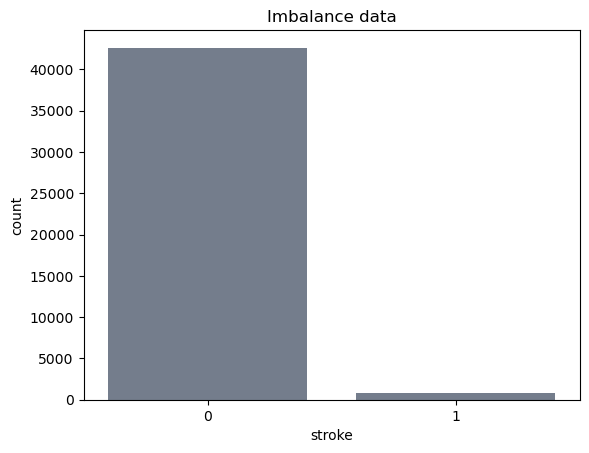

In [16]:
colors = [plt.cm.bone(0.7), plt.cm.bone(0.3)] 

sns.countplot(x='stroke', data=df, color= plt.cm.bone(0.5))
plt.title("Imbalance data")
plt.show()

In [17]:
# Calculate Z-Score for each numerical column , (observation - mean)/ Standard deviation 
z_scores = (df.select_dtypes(include=np.number) - df.select_dtypes(include=np.number).mean()) / df.select_dtypes(include=np.number).std()

# Identify outliers (threshold of 3 for demonstration)
outliers = (z_scores > 3) | (z_scores < -3)

# Display outliers
print("Outliers:")
display(df[outliers.any(axis=1)]["stroke"].value_counts())


Outliers:


stroke
0    5969
1     783
Name: count, dtype: int64

Index(['age', 'avg_glucose_level', 'bmi'], dtype='object')

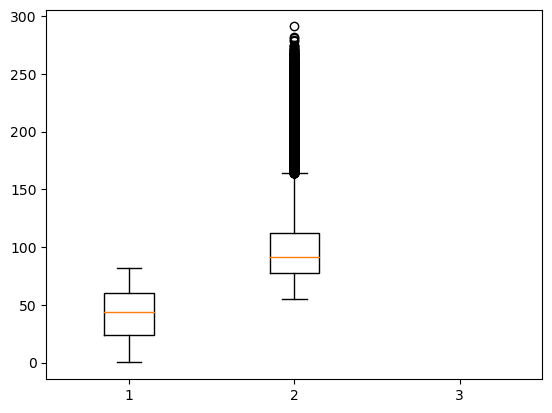

In [18]:
float_columns = df.select_dtypes(include=['float64']).columns
plt.boxplot(df[float_columns])
display(float_columns)

{'whiskers': [<matplotlib.lines.Line2D at 0x132bbb050>,
 'caps': [<matplotlib.lines.Line2D at 0x132bd4710>,
 'boxes': [<matplotlib.lines.Line2D at 0x132bba550>],
 'medians': [<matplotlib.lines.Line2D at 0x132bd7b50>],
 'fliers': [<matplotlib.lines.Line2D at 0x132b9bf10>],
 'means': []}

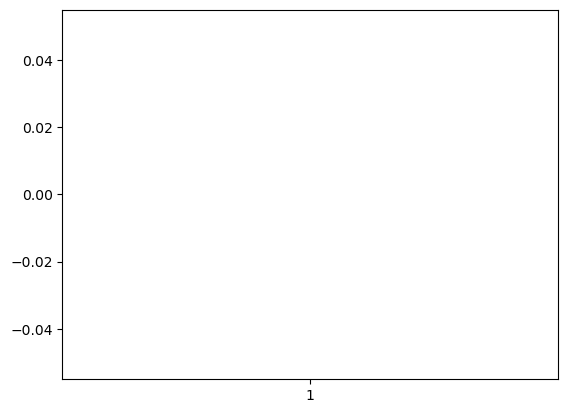

In [19]:
plt.boxplot(df[["bmi"]])


Text(0.5, 1.0, 'Percentage of Stroke AND Not Stroke')

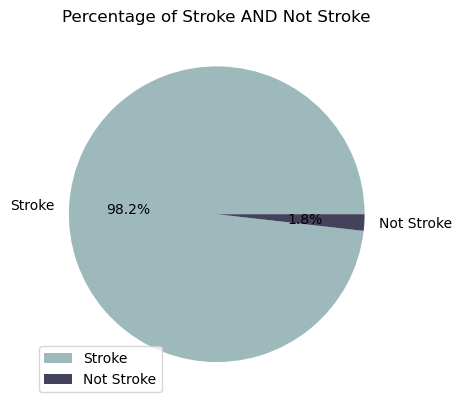

In [20]:
colors = [plt.cm.bone(0.7), plt.cm.bone(0.3)] 
plt.pie(df["stroke"].value_counts().values, labels=["Stroke", "Not Stroke"], autopct= '%1.1f%%',colors=colors)
plt.legend(["Stroke", "Not Stroke"])
plt.title("Percentage of Stroke AND Not Stroke")



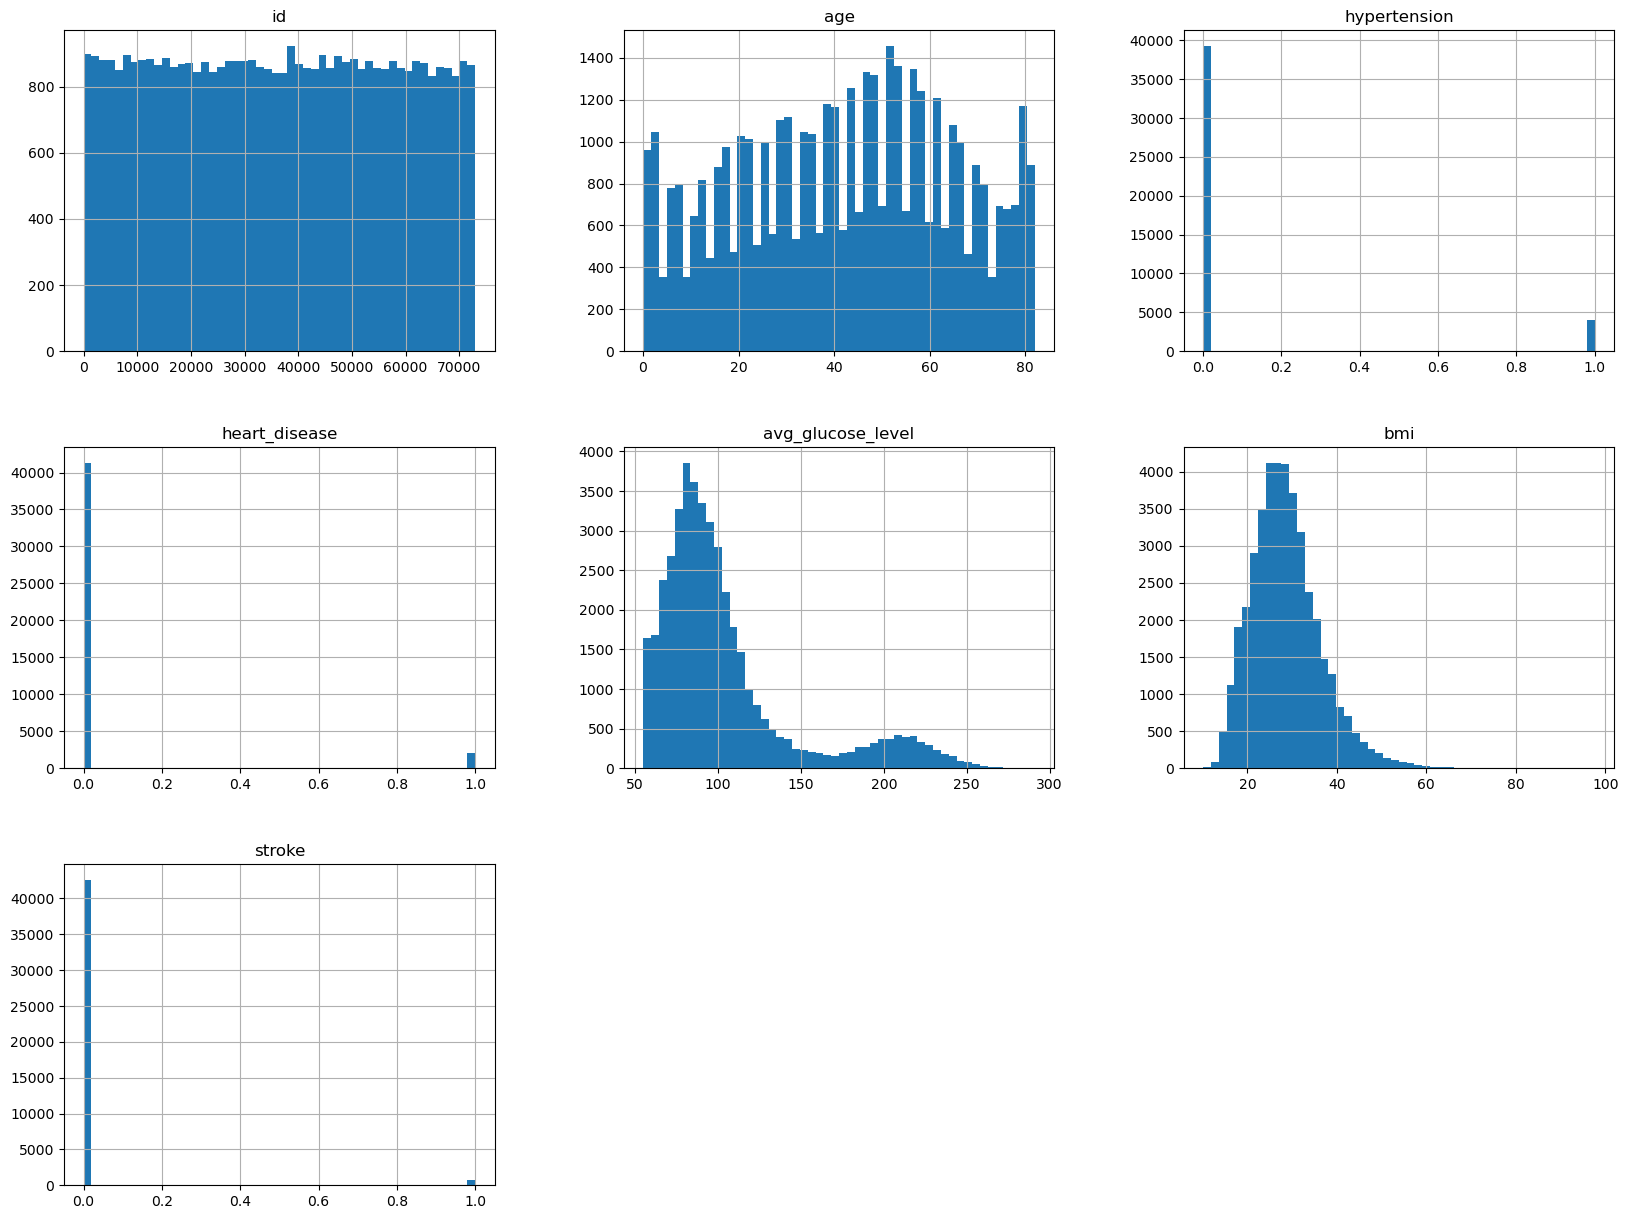

In [21]:
df.hist(bins =50 , figsize=(20,15))
plt.show()


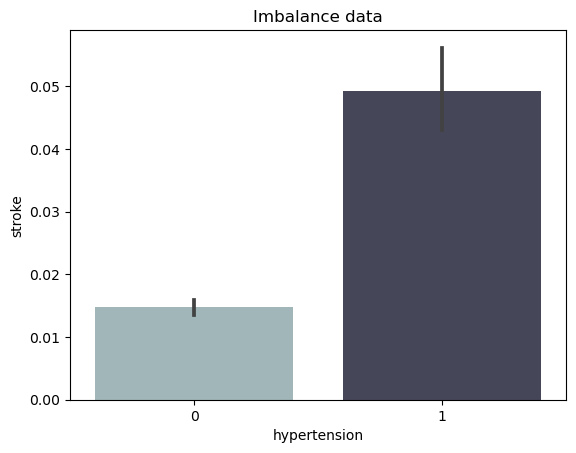

In [22]:

sns.barplot(x='hypertension',y="stroke", data=df,palette=colors)
plt.title("Imbalance data")
plt.show()

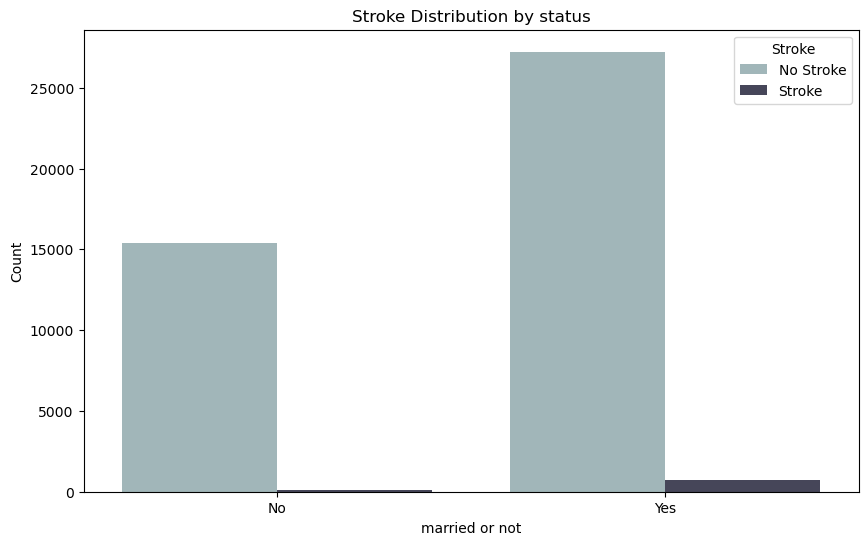

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count plot of stroke by gender
plt.figure(figsize=(10, 6))
sns.countplot(x='ever_married', hue='stroke', data=df, palette=colors)
plt.title('Stroke Distribution by status')
plt.xlabel('married or not')
plt.ylabel('Count')
plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'])
plt.show()


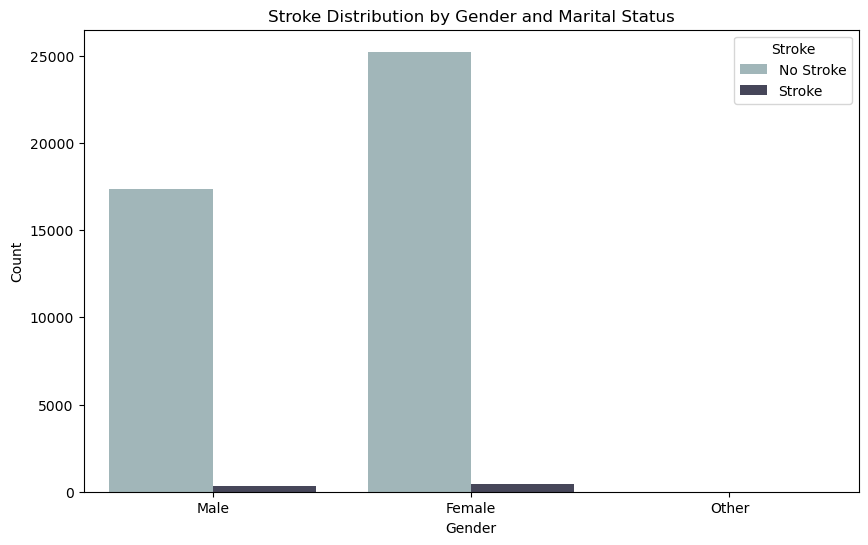

In [24]:

# Count plot of stroke by gender and marital status
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue='stroke', data=df, palette=colors, hue_order=[0,1])
plt.title('Stroke Distribution by Gender and Marital Status')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'])
plt.show()


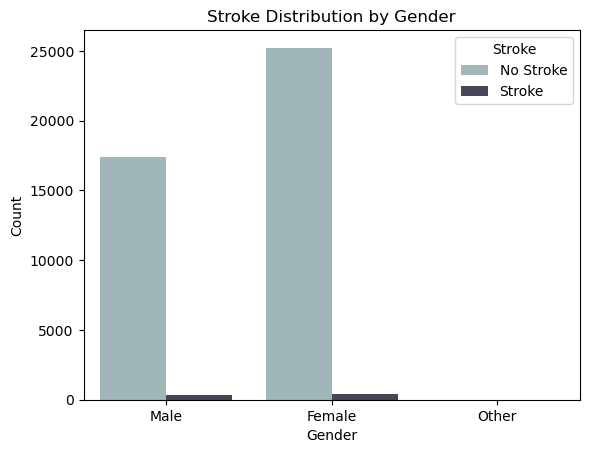

In [25]:
sns.countplot(x='gender', hue='stroke', data=df, palette=colors)
plt.title('Stroke Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'])
plt.show()

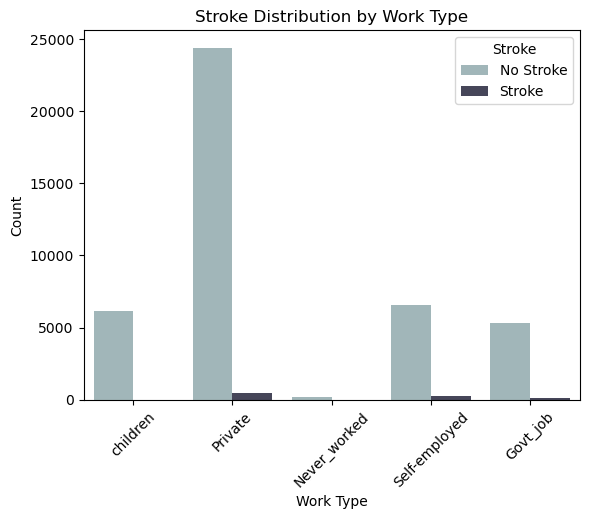

In [26]:
sns.countplot(x='work_type', hue='stroke', data=df, palette=colors)
plt.title('Stroke Distribution by Work Type')
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'])
plt.xticks(rotation=45)
plt.show()


In [27]:
import pandas as pd

def addcolumns(df):
    # Bin age and bmi into intervals
    age_bins = [0, 18, 30, 45, 60, 75, 90, 100]
    bmi_bins = [0, 18.5, 25, 30, 35, 40, 100]
    
    df['age_interval'] = pd.cut(df['age'], bins=age_bins, labels=['0-18', '19-30', '31-45', '46-60', '61-75', '76-90', '91-100'])
    df['bmi_interval'] = pd.cut(df['bmi'], bins=bmi_bins, labels=['Underweight', 'Normal weight', 'Overweight', 'Obese I', 'Obese II', 'Obese III'])
    

    return  df

# Example usage
addcolumns(df)
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_interval,bmi_interval
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0,0-18,Underweight
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0,46-60,Obese II
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0,0-18,Underweight
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0,61-75,Obese II
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0,0-18,Normal weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43395,56196,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0,0-18,Normal weight
43396,5450,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0,46-60,Obese III
43397,28375,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0,76-90,Overweight
43398,27973,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0,31-45,Obese I


In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd



# Count plot of stroke by gender, marital status, and age group
plt.figure(figsize=(12, 6))
sns.countplot(x='gender', hue='age_interval', data=df, palette=colors, hue_order=['0-18', '19-35', '36-50', '51-70', '71-100'])
plt.title('Stroke Distribution by Gender Age Group')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Age Group')
plt.show()


ValueError: Could not interpret input 'gender'

<Figure size 1200x600 with 0 Axes>

/Users/masaaladwan/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/masaaladwan/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


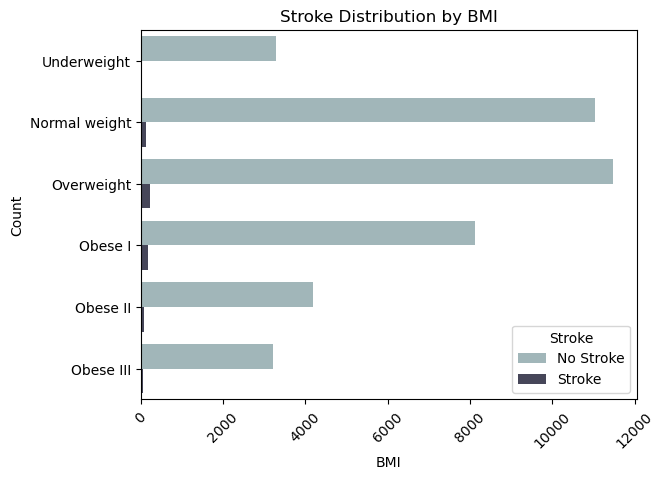

/Users/masaaladwan/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


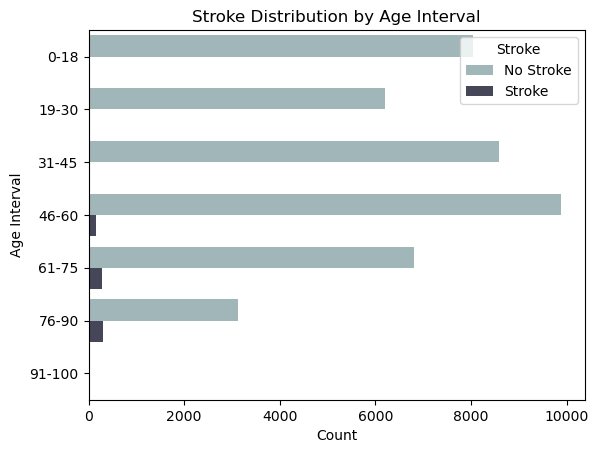

In [29]:
sns.countplot(y='bmi_interval', hue='stroke', data=df, palette=colors)
plt.title('Stroke Distribution by BMI')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'])
plt.xticks(rotation=45)
plt.show()

sns.countplot(y='age_interval', hue='stroke', data=df, palette=colors)
plt.title('Stroke Distribution by Age Interval')
plt.xlabel('Count')
plt.ylabel('Age Interval')
plt.legend(title='Stroke', labels=['No Stroke', 'Stroke'])
plt.xticks(rotation=0)
plt.show()


see how many null values in the class 1 

In [30]:
df[pd.isna(df["bmi"]) & pd.isna(df["smoking_status"]) & (df["stroke"] == 1)].count()


id                   50
gender               50
age                  50
hypertension         50
heart_disease        50
ever_married         50
work_type            50
Residence_type       50
avg_glucose_level    50
bmi                   0
smoking_status        0
stroke               50
age_interval         50
bmi_interval          0
dtype: int64

### I want to see if there is realtion between bmi , smoking with stroke 

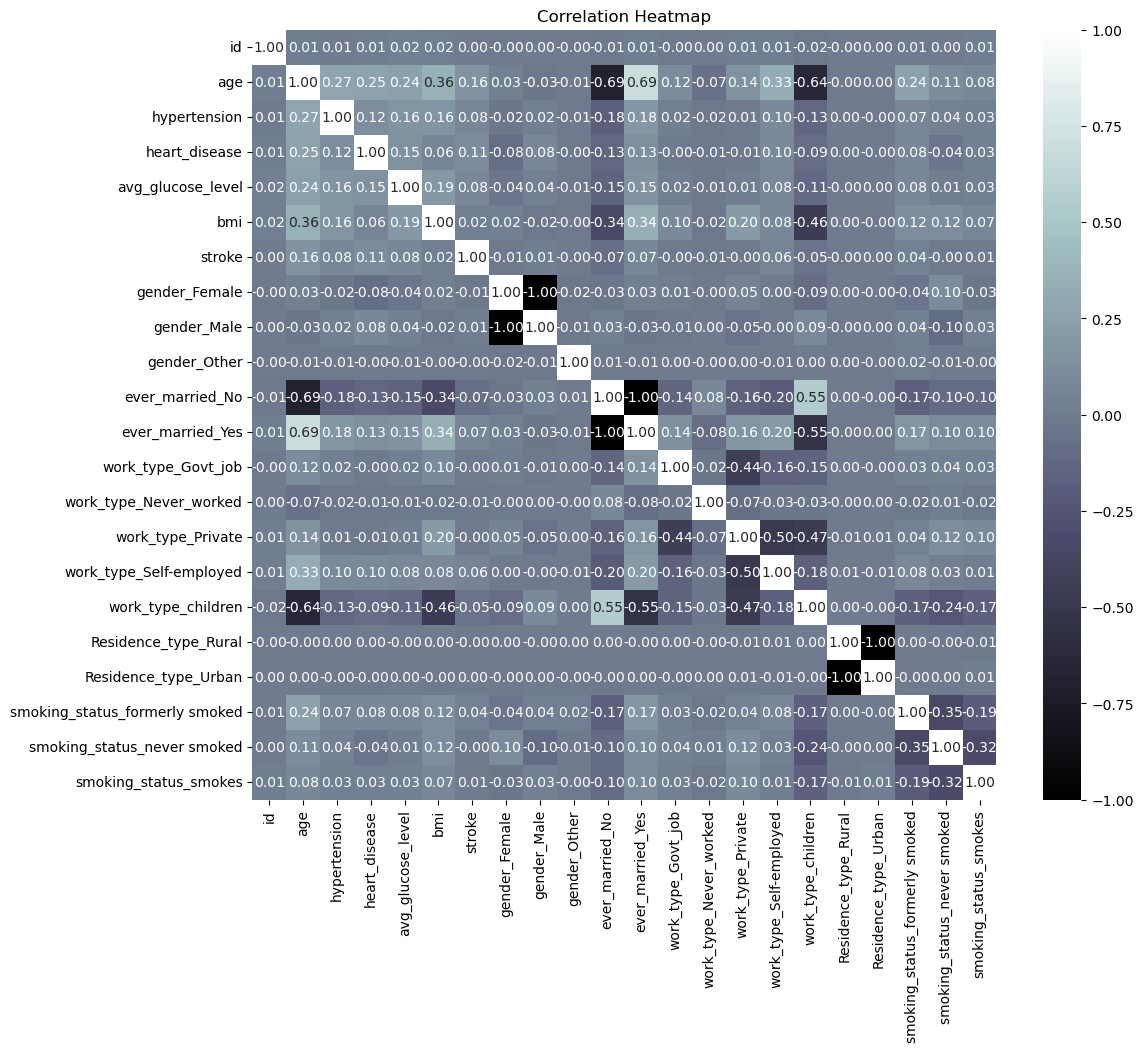

In [31]:
df=df.drop(columns=["age_interval","bmi_interval"])
df_encoded = pd.get_dummies(df)


# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap( df_encoded.corr(), annot=True,cmap="bone", fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


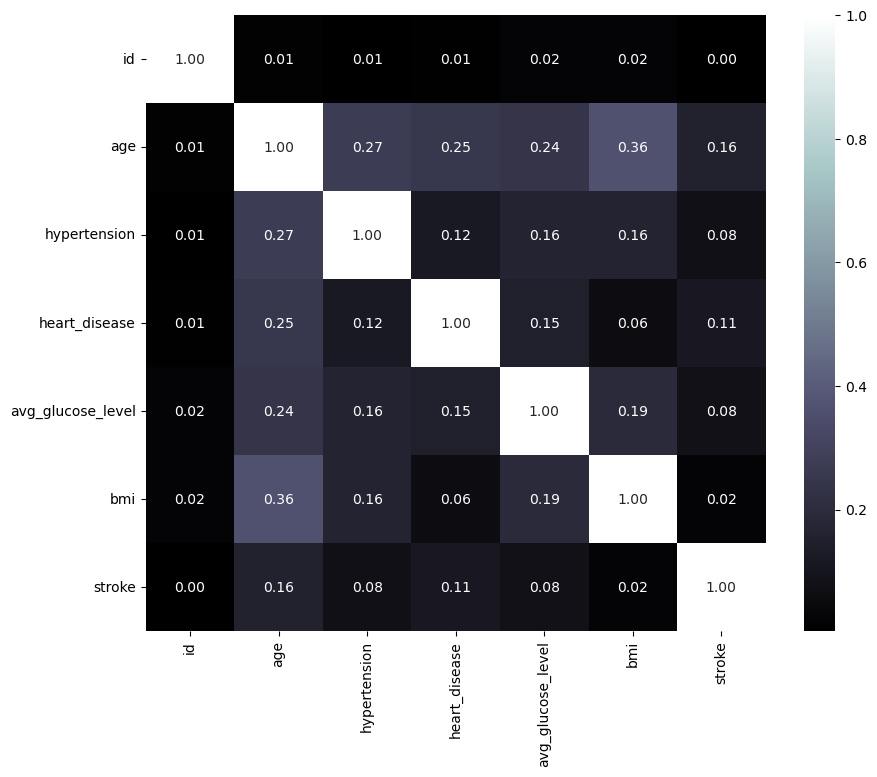

In [32]:
numeric_columns = df.select_dtypes(include=np.number)

# Compute correlation matrix
corr_matrix = numeric_columns.corr()

# Plot the correlation matrix
plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True,cmap="bone",fmt=".2f")
plt.show()

# Data Preprocessing 

There are multiple ways we can use to deal with an values , we can either fill them with the mode , or create a models that will predict the null values(KNN , random forest ,...) , we will try multiple ones and see who give us better accuracy


# Handling BMI 

In [33]:
# Econding non ordinal category columns , hence we will use OneHotEncoder 

df = pd.get_dummies(df,columns=['gender','ever_married','work_type','Residence_type','smoking_status'])

In [34]:
#knn 
knn =  KNNImputer(missing_values=np.nan)
data = knn.fit_transform(df)
knn_data = pd.DataFrame(data , columns=df.columns)

In [35]:
nan_values(knn_data)

,index,Nan count,Nan Percentage,num_unique
0,id,0,0.0,43400
1,age,0,0.0,104
2,smoking_status_never smoked,0,0.0,2
3,smoking_status_formerly smoked,0,0.0,2
4,Residence_type_Urban,0,0.0,2
5,Residence_type_Rural,0,0.0,2
6,work_type_children,0,0.0,2
7,work_type_Self-employed,0,0.0,2
8,work_type_Private,0,0.0,2
9,work_type_Never_worked,0,0.0,2


In [36]:
# or Interpolation , how to know which one is better ? 
interpolate_data = df.copy()
interpolate_data['bmi'] = interpolate_data['bmi'].interpolate(method='linear', limit_direction='both')
nan_values(interpolate_data)


,index,Nan count,Nan Percentage,num_unique
0,id,0,0.0,43400
1,age,0,0.0,104
2,smoking_status_never smoked,0,0.0,2
3,smoking_status_formerly smoked,0,0.0,2
4,Residence_type_Urban,0,0.0,2
5,Residence_type_Rural,0,0.0,2
6,work_type_children,0,0.0,2
7,work_type_Self-employed,0,0.0,2
8,work_type_Private,0,0.0,2
9,work_type_Never_worked,0,0.0,2


In [37]:
#check the shape after encoding 
df.shape

(43400, 22)

# Model 

In [38]:
# we will try the knn data first 
knn_data= knn_data .drop(columns=["id"])


In [39]:
knn_data.shape

(43400, 21)

In [ ]:

"""
#Reverse the one-hot encoding
# Define the columns to be reversed
categorical_columns = {
    'gender': ['gender_Female', 'gender_Male', 'gender_Other'],
    'ever_married': ['ever_married_No', 'ever_married_Yes'],
    'work_type': ['work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'work_type_children'],
    'Residence_type': ['Residence_type_Rural', 'Residence_type_Urban'],
    'smoking_status': ['smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes']
}

for col, dummy_cols in categorical_columns.items():
    # Find the index of the max value in the dummy columns
    knn_data[col] = knn_data[dummy_cols].idxmax(axis=1)
    # Replace the column names with the original category names
    knn_data[col] = knn_data[col].apply(lambda x: x.split('_', 1)[1])

# Drop the dummy columns
knn_data.drop(columns=[col for cols in categorical_columns.values() for col in cols], inplace=True)

# Display the resulting DataFrame
print(knn_data)"""

In [40]:
X = knn_data.drop('stroke',axis=1)
y = knn_data['stroke']


In [41]:
knn_data.max()

age                                82.00
hypertension                        1.00
heart_disease                       1.00
avg_glucose_level                 291.05
bmi                                97.60
stroke                              1.00
gender_Female                       1.00
gender_Male                         1.00
gender_Other                        1.00
ever_married_No                     1.00
ever_married_Yes                    1.00
work_type_Govt_job                  1.00
work_type_Never_worked              1.00
work_type_Private                   1.00
work_type_Self-employed             1.00
work_type_children                  1.00
Residence_type_Rural                1.00
Residence_type_Urban                1.00
smoking_status_formerly smoked      1.00
smoking_status_never smoked         1.00
smoking_status_smokes               1.00
dtype: float64

In [42]:
knn_data.dtypes

age                               float64
hypertension                      float64
heart_disease                     float64
avg_glucose_level                 float64
bmi                               float64
stroke                            float64
gender_Female                     float64
gender_Male                       float64
gender_Other                      float64
ever_married_No                   float64
ever_married_Yes                  float64
work_type_Govt_job                float64
work_type_Never_worked            float64
work_type_Private                 float64
work_type_Self-employed           float64
work_type_children                float64
Residence_type_Rural              float64
Residence_type_Urban              float64
smoking_status_formerly smoked    float64
smoking_status_never smoked       float64
smoking_status_smokes             float64
dtype: object

In [43]:
float_columns = knn_data.select_dtypes(include=['float64']).columns

# Apply MinMaxScaler only to float columns
scaler = MinMaxScaler()
knn_data[float_columns] = scaler.fit_transform(knn_data[float_columns])

# Separate features and target
X = knn_data.drop(columns=['stroke'])
y = knn_data['stroke']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [44]:
X

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.035645,0.0,0.0,0.169964,0.090286,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0.707031,1.0,0.0,0.139631,0.332571,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.096680,0.0,0.0,0.236772,0.085714,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.853516,0.0,0.0,0.059479,0.294857,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,0.169922,0.0,0.0,0.450244,0.102857,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43395,0.121094,0.0,0.0,0.015420,0.117714,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
43396,0.682617,0.0,0.0,0.671934,0.517714,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
43397,1.000000,1.0,0.0,0.156492,0.214857,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
43398,0.487305,0.0,0.0,0.187079,0.264000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [45]:
nan_values(X)

,index,Nan count,Nan Percentage,num_unique
0,age,0,0.0,104
1,hypertension,0,0.0,2
2,smoking_status_never smoked,0,0.0,2
3,smoking_status_formerly smoked,0,0.0,2
4,Residence_type_Urban,0,0.0,2
5,Residence_type_Rural,0,0.0,2
6,work_type_children,0,0.0,2
7,work_type_Self-employed,0,0.0,2
8,work_type_Private,0,0.0,2
9,work_type_Never_worked,0,0.0,2


In [46]:
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler


# Separate features and labels
X = knn_data.drop('stroke', axis=1)
y = knn_data['stroke']

# Oversample stroke  (label 1)
oversampler = RandomOverSampler(sampling_strategy={1: 21307},random_state=42)
X_res, y_res = oversampler.fit_resample(X, y)


# Undersample non stroke (label 0)
undersampler = RandomUnderSampler(sampling_strategy={0: 21307}, random_state=42)
X_res, y_res = undersampler.fit_resample(X_res, y_res)



# Combine X_res and y_res back into a DataFrame
df_resampled = pd.DataFrame(X_res, columns=X.columns)
df_resampled['stroke'] = y_res

# Display the class distribution
print(df_resampled['stroke'].value_counts())

X = df_resampled.drop('stroke', axis=1)
y = df_resampled['stroke']
# Perform train-test split
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X, y, test_size=0.3, random_state=42)



stroke
0.0    21307
1.0    21307
Name: count, dtype: int64


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Instantiate the BaggingClassifier and GradientBoostingClassifier
bagging_clf = BaggingClassifier(random_state=42)
boosting_clf = GradientBoostingClassifier(random_state=42)

# Train the models
bagging_clf.fit(X_train_resampled, y_train_resampled)
boosting_clf.fit(X_train_resampled, y_train_resampled)

# Make predictions
bagging_pred = bagging_clf.predict(X_test_resampled)
boosting_pred = boosting_clf.predict(X_test_resampled)

# Calculate evaluation metrics
bagging_report_model = classification_report(y_test_resampled, bagging_pred)
boosting_report_model = classification_report(y_test_resampled, boosting_pred)

bagging_accuracy = accuracy_score(y_test_resampled, bagging_pred)
boosting_accuracy = accuracy_score(y_test_resampled, boosting_pred)


# Print the evaluation metrics
print("Bagging Classification report:")
print(bagging_report_model)
print("Accuracy:", bagging_accuracy)
print()

print("Bagging Classification report:")
print(boosting_report_model)
print("Accuracy:", boosting_accuracy)
print()


# resourse for stacking classifier :https://www.kaggle.com/code/marcinrutecki/stacking-classifier-ensemble-for-great-results#5.1-Level-0-with-28-Models

In [47]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier
#from sklearn.ensemble import VotingClassifier

from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [48]:
estimators = [
    #('AdaBoost', AdaBoostClassifier(random_state=13)),
    #('Bagging', BaggingClassifier(random_state=13)),
    ('DecisionTree', DecisionTreeClassifier(random_state=13)),
    #('Dummy', DummyClassifier(random_state=13)),
    ('GaussianNB', GaussianNB()),
    ('GradientBoosting', GradientBoostingClassifier(random_state=13)),
    ('KNN', KNeighborsClassifier()),
    ('LogisticRegression', LogisticRegression(max_iter=1000, random_state=13)),
    #('MLP', MLPClassifier(max_iter=2000, random_state=13)),
    #('NearestCentroid', NearestCentroid()),
    #('PassiveAggressive', PassiveAggressiveClassifier(random_state=13)),
    ('RandomForest', RandomForestClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=170, random_state=13)),
    ('XGB', XGBClassifier(random_state=13)),
    ('CatBoost', CatBoostClassifier(logging_level='Silent', random_state=13))
]
XGB = XGBClassifier(random_state=42)
boosting_and_bagging_estimators = [
    ('AdaBoost', AdaBoostClassifier(random_state=13)),
    ('GradientBoosting', GradientBoostingClassifier(random_state=13)),
    ('XGB', XGBClassifier(random_state=13)),
    ('CatBoost', CatBoostClassifier(logging_level='Silent', random_state=13)),
    ('Bagging', BaggingClassifier(random_state=13)),
    ('RandomForest', RandomForestClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=3, n_estimators=170, random_state=13)),
]


In [49]:


XGB = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
SC_resampled = StackingClassifier(estimators=boosting_and_bagging_estimators, cv=6)

SC_resampled.fit(X_train_resampled, y_train_resampled)

train_accuracy = SC_resampled.score(X_train_resampled, y_train_resampled)
test_accuracy = SC_resampled.score(X_test_resampled, y_test_resampled)
y_pred = SC_resampled.predict(X_test_resampled)
report = classification_report(y_test_resampled, y_pred)

# Train and evaluate individual models for comparison
for name, model in boosting_and_bagging_estimators:
    model.fit(X_train_resampled, y_train_resampled)  
    train_accuracy_model = model.score(X_train_resampled, y_train_resampled)
    test_accuracy_model = model.score(X_test_resampled, y_test_resampled)
    y_pred_model = model.predict(X_test_resampled)
    report_model = classification_report(y_test_resampled, y_pred_model)
    
    print(f"{name} training Accuracy: {train_accuracy_model:.2f}")
    print(f"{name} test Accuracy: {test_accuracy_model:.2f}")
    print(f"{name} classification report:\n{report_model}\n")
    display(pd.crosstab(y_test_resampled, y_pred_model))

# Display results for the stacking classifier
print(f"\nStacking classifier training Accuracy: {train_accuracy:.2f}")
print(f"Stacking classifier test Accuracy: {test_accuracy:.2f}")
print(f"Stacking classifier classification report:\n{report}\n")


/Users/masaaladwan/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/masaaladwan/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/masaaladwan/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/Users/masaaladwan/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorit

AdaBoost training Accuracy: 0.79
AdaBoost test Accuracy: 0.78
AdaBoost classification report:
              precision    recall  f1-score   support

         0.0       0.83      0.71      0.77      6384
         1.0       0.75      0.85      0.80      6401

    accuracy                           0.78     12785
   macro avg       0.79      0.78      0.78     12785
weighted avg       0.79      0.78      0.78     12785




col_0,0.0,1.0
stroke,,
0.0,4538,1846
1.0,939,5462


GradientBoosting training Accuracy: 0.82
GradientBoosting test Accuracy: 0.81
GradientBoosting classification report:
              precision    recall  f1-score   support

         0.0       0.85      0.74      0.80      6384
         1.0       0.77      0.87      0.82      6401

    accuracy                           0.81     12785
   macro avg       0.81      0.81      0.81     12785
weighted avg       0.81      0.81      0.81     12785




col_0,0.0,1.0
stroke,,
0.0,4750,1634
1.0,811,5590


XGB training Accuracy: 0.97
XGB test Accuracy: 0.95
XGB classification report:
              precision    recall  f1-score   support

         0.0       1.00      0.91      0.95      6384
         1.0       0.91      1.00      0.96      6401

    accuracy                           0.95     12785
   macro avg       0.96      0.95      0.95     12785
weighted avg       0.96      0.95      0.95     12785




col_0,0,1
stroke,,
0.0,5786,598
1.0,0,6401


CatBoost training Accuracy: 0.96
CatBoost test Accuracy: 0.94
CatBoost classification report:
              precision    recall  f1-score   support

         0.0       0.99      0.88      0.94      6384
         1.0       0.89      1.00      0.94      6401

    accuracy                           0.94     12785
   macro avg       0.94      0.94      0.94     12785
weighted avg       0.94      0.94      0.94     12785




col_0,0.0,1.0
stroke,,
0.0,5633,751
1.0,29,6372


Bagging training Accuracy: 1.00
Bagging test Accuracy: 0.99
Bagging classification report:
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99      6384
         1.0       0.98      1.00      0.99      6401

    accuracy                           0.99     12785
   macro avg       0.99      0.99      0.99     12785
weighted avg       0.99      0.99      0.99     12785




col_0,0.0,1.0
stroke,,
0.0,6260,124
1.0,0,6401


RandomForest training Accuracy: 0.88
RandomForest test Accuracy: 0.87
RandomForest classification report:
              precision    recall  f1-score   support

         0.0       0.92      0.81      0.86      6384
         1.0       0.83      0.93      0.88      6401

    accuracy                           0.87     12785
   macro avg       0.87      0.87      0.87     12785
weighted avg       0.87      0.87      0.87     12785




col_0,0.0,1.0
stroke,,
0.0,5151,1233
1.0,453,5948



Stacking classifier training Accuracy: 1.00
Stacking classifier test Accuracy: 1.00
Stacking classifier classification report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      6384
         1.0       1.00      1.00      1.00      6401

    accuracy                           1.00     12785
   macro avg       1.00      1.00      1.00     12785
weighted avg       1.00      1.00      1.00     12785




In [52]:
#lgBoosting
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(n_estimators=100, learning_rate=0.1)
lgb.fit(X_train_resampled, y_train_resampled)
pred = lgb.predict(X_test_resampled)
lgboosting_accuracy = accuracy_score(y_test_resampled, pred)
print("LGBoost Accuracy:", lgboosting_accuracy)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 14906, number of negative: 14923
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001023 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 646
[LightGBM] [Info] Number of data points in the train set: 29829, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499715 -> initscore=-0.001140
[LightGBM] [Info] Start training from score -0.001140
LGBoost Accuracy: 0.9038717246773563
